In [4]:
%store -r trainX
%store -r testX
%store -r trainY
%store -r testY
%store -r valX
%store -r valY
%store -r le

In [5]:
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D,Input
# from tensorflow.keras.layers import LSTM, GRU, SimpleRNN
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


## Feed Forward Neural Network

In [6]:
s=100
batch_size = 20
epochs = 50

In [8]:
model = Sequential()
model.add(Flatten())
model.add(Input(shape=(s,s,3)))
model.add(keras.layers.BatchNormalization())
model.add(Dense(512,  activation="sigmoid"))
model.add(Dense(256, activation="sigmoid"))
model.add(keras.layers.BatchNormalization())
model.add(Dense(4, activation="softmax"))
model.build(input_shape = trainX.shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (902, 30000)              0         
_________________________________________________________________
input_2 (InputLayer)         multiple                  0         
_________________________________________________________________
batch_normalization (BatchNo (902, 30000)              120000    
_________________________________________________________________
dense (Dense)                (902, 512)                15360512  
_________________________________________________________________
dense_1 (Dense)              (902, 256)                131328    
_________________________________________________________________
batch_normalization_1 (Batch (902, 256)                1024      
_________________________________________________________________
dense_2 (Dense)              (902, 4)                 

In [9]:
model.compile(optimizer = 'adam',
              loss= keras.losses.categorical_crossentropy,
              metrics= ['accuracy']
             )

In [10]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (902, 30000)              0         
_________________________________________________________________
input_2 (InputLayer)         multiple                  0         
_________________________________________________________________
batch_normalization (BatchNo (902, 30000)              120000    
_________________________________________________________________
dense (Dense)                (902, 512)                15360512  
_________________________________________________________________
dense_1 (Dense)              (902, 256)                131328    
_________________________________________________________________
batch_normalization_1 (Batch (902, 256)                1024      
_________________________________________________________________
dense_2 (Dense)              (902, 4)                 

In [11]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'auto',
    min_delta = 0,
    patience = 5,
    verbose = 1,
    restore_best_weights = True
)

In [12]:
FFNNmodel = model.fit(trainX,
                     trainY, 
                     epochs=epochs,
                     callbacks = [early_stopping],
                     validation_data = (valX,valY),
                     batch_size=batch_size,
                     verbose=1
)

Epoch 1/50
46/46 [==============================] - 8s 132ms/step - loss: 2.0579 - accuracy: 0.4725 - val_loss: 1.4334 - val_accuracy: 0.4646
Epoch 2/50
46/46 [==============================] - 5s 108ms/step - loss: 0.9327 - accuracy: 0.6119 - val_loss: 1.2746 - val_accuracy: 0.4646
Epoch 3/50
46/46 [==============================] - 6s 129ms/step - loss: 0.8596 - accuracy: 0.6481 - val_loss: 1.2047 - val_accuracy: 0.4779
Epoch 4/50
46/46 [==============================] - 8s 170ms/step - loss: 0.7368 - accuracy: 0.7105 - val_loss: 0.9930 - val_accuracy: 0.5531
Epoch 5/50
46/46 [==============================] - 8s 179ms/step - loss: 0.7483 - accuracy: 0.7088 - val_loss: 0.9829 - val_accuracy: 0.5487
Epoch 6/50
46/46 [==============================] - 7s 155ms/step - loss: 0.7058 - accuracy: 0.7191 - val_loss: 1.0724 - val_accuracy: 0.5531
Epoch 7/50
46/46 [==============================] - 8s 171ms/step - loss: 0.6906 - accuracy: 0.7138 - val_loss: 0.9438 - val_accuracy: 0.6062
Epoch 

In [13]:
modelLoss, modelAccuracy = model.evaluate(testX, testY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))



Test Loss is 0.9537246823310852
Test Accuracy is 0.6289752721786499


In [14]:
modelLoss, modelAccuracy = model.evaluate(trainX, trainY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))



Test Loss is 0.4878520369529724
Test Accuracy is 0.7915742993354797


In [15]:
# classification report on train
predIdxs = model.predict(trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    0.69466   0.60265   0.64539       151
Lung Opacity    0.81106   0.68750   0.74419       256
      Normal    0.79242   0.90639   0.84558       438
   Pneumonia    0.94340   0.87719   0.90909        57

    accuracy                        0.79157       902
   macro avg    0.81038   0.76843   0.78606       902
weighted avg    0.79088   0.79157   0.78730       902



In [16]:
# classification report on test

predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    0.45455   0.40816   0.43011        49
Lung Opacity    0.60345   0.43750   0.50725        80
      Normal    0.66667   0.80882   0.73090       136
   Pneumonia    0.81250   0.72222   0.76471        18

    accuracy                        0.62898       283
   macro avg    0.63429   0.59418   0.60824       283
weighted avg    0.62134   0.62898   0.61774       283



In [23]:
class_names = list(le.classes_)
y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[11])])

Normal


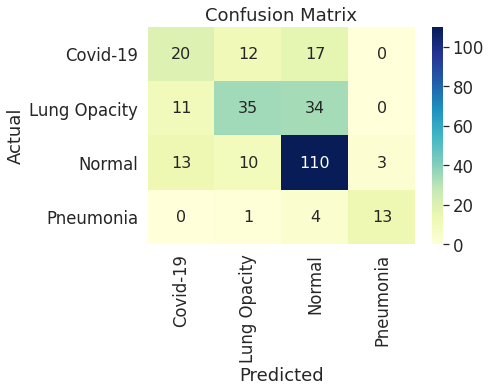

In [24]:
# Plotting Confusion Matrix
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x,index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()

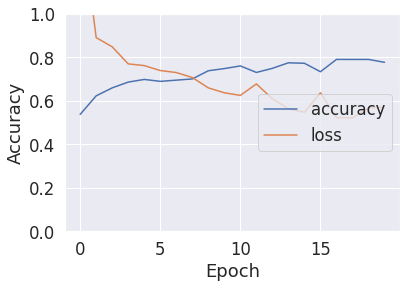

In [25]:
plt.plot(FFNNmodel.history['accuracy'], label='accuracy')
plt.plot(FFNNmodel.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='center right')


In [27]:
model.save('FFNN_Covid19_Xray_V1.h5') 